In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def prims_mst(graph: np.ndarray[int]) -> np.ndarray[int]:
    n = graph.shape[0]
    mst = np.zeros((n, n))
    visited = np.zeros(n, dtype=bool)
    visited[0] = True
    for _ in range(n - 1):
        min_edge = np.inf
        min_edge_idx = None
        for i in range(n):
            if visited[i]:
                for j in range(n):
                    if not visited[j] and graph[i, j] < min_edge:
                        min_edge = graph[i, j]
                        min_edge_idx = (i, j)
        mst[min_edge_idx[::-1]] = min_edge
        visited[min_edge_idx[1]] = True
    return mst

In [30]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [31]:
def distance_matrix(df):
    n = df.shape[0]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = euclidean_distance(df.iloc[i], df.iloc[j])
    return dist_matrix

In [32]:
def plot_graph(df, graph, clusters=None):
    if clusters is None:
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o')
    else:
        for i in range(len(clusters)):
            plt.scatter(df.iloc[list(clusters[i]), 0], df.iloc[list(clusters[i]), 1], marker='o')
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i, j] != 0:
                plt.plot([df.iloc[i, 0], df.iloc[j, 0]], [df.iloc[i, 1], df.iloc[j, 1]], color='grey')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])

# 1. Load the Iris dataset.

In [33]:
iris_df = pd.read_csv('iris.csv').drop('Id', axis=1)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Extract the sepal length and sepal width columns.

In [34]:
cols = ['SepalLengthCm', 'SepalWidthCm']
iris_req_df = iris_df[cols]
iris_req_df

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# 3. Calculate the pairwise Euclidean distances between data points using the selected features.

In [35]:
dist_mat = distance_matrix(iris_req_df)
dist_mat

array([[0.        , 0.53851648, 0.5       , ..., 1.48660687, 1.1045361 ,
        0.94339811],
       [0.53851648, 0.        , 0.28284271, ..., 1.6       , 1.36014705,
        1.        ],
       [0.5       , 0.28284271, 0.        , ..., 1.81107703, 1.5132746 ,
        1.21655251],
       ...,
       [1.48660687, 1.6       , 1.81107703, ..., 0.        , 0.5       ,
        0.6       ],
       [1.1045361 , 1.36014705, 1.5132746 , ..., 0.5       , 0.        ,
        0.5       ],
       [0.94339811, 1.        , 1.21655251, ..., 0.6       , 0.5       ,
        0.        ]])

# 4. Build the Minimum Spanning Tree using Prim's/Kruskal’s algorithm.

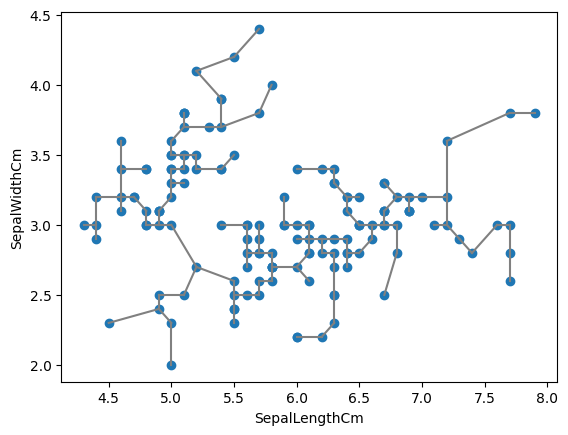

In [36]:
mst = prims_mst(dist_mat)

# visualize MST
plot_graph(iris_req_df, mst)
plt.show()

# 5. Identify the two longest edges in the MST and remove them to create three clusters.

In [37]:
# find 2 max edges
max_indices = np.unravel_index(np.argsort(mst, axis=None)[-2:], mst.shape)
max_indices

(array([ 41, 117]), array([ 57, 109]))

In [38]:
# remove max edges
new_mst = mst.copy()
new_mst[max_indices] = 0

# 6. Visualize the Minimum Spanning Tree with identified clusters.

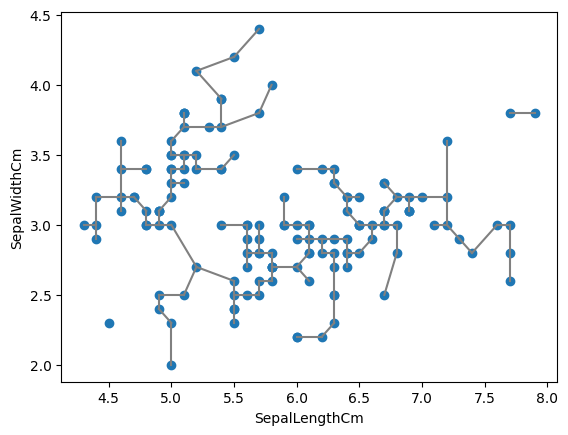

In [39]:
# visualize clusters
plot_graph(iris_req_df, new_mst)
plt.show()